In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
df = pd.read_csv('EDADataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1206 non-null   int64  
 1   No.                1206 non-null   int64  
 2   Job Title          1206 non-null   object 
 3   Salary Estimate    1206 non-null   object 
 4   Job Description    1206 non-null   object 
 5   Rating             1206 non-null   float64
 6   Company Name       1206 non-null   object 
 7   Location           1206 non-null   object 
 8   Headquarters       1206 non-null   object 
 9   Size               1206 non-null   object 
 10  Founded            1206 non-null   int64  
 11  Type of ownership  1206 non-null   object 
 12  Industry           1206 non-null   object 
 13  Sector             1206 non-null   object 
 14  Revenue            1206 non-null   object 
 15  Competitors        435 non-null    object 
 16  Easy Apply         1206 

### From here, we choose the columns we need for model building

In [4]:
Modeldata = df[['Annual avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','State_Location',
             'Age','JobSpilt','SeniorityRoles','Python_job','SQL_job','Excel_job','Tableau_job']]

In [5]:
Modeldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Annual avg_salary  1206 non-null   float64
 1   Rating             1206 non-null   float64
 2   Size               1206 non-null   object 
 3   Type of ownership  1206 non-null   object 
 4   Industry           1206 non-null   object 
 5   Sector             1206 non-null   object 
 6   Revenue            1206 non-null   object 
 7   State_Location     1206 non-null   object 
 8   Age                1206 non-null   int64  
 9   JobSpilt           1206 non-null   object 
 10  SeniorityRoles     1206 non-null   object 
 11  Python_job         1206 non-null   int64  
 12  SQL_job            1206 non-null   int64  
 13  Excel_job          1206 non-null   int64  
 14  Tableau_job        1206 non-null   int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 141.5+ KB


In [6]:
dummymodel = pd.get_dummies(Modeldata)

### After getting the columns required, create train & test set

In [7]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [8]:
X = dummymodel.drop('Annual avg_salary', axis =1)
y = dummymodel['Annual avg_salary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### OLS Regression

In [9]:
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

C:\Users\dinos\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     4.984
Date:                Sat, 23 Apr 2022   Prob (F-statistic):           2.04e-50
Time:                        15:23:53   Log-Likelihood:                -5238.3
No. Observations:                1206   AIC:                         1.074e+04
Df Residuals:                    1076   BIC:                         1.140e+04
Df Model:                         129                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 34.9291      3.477     10.045      0.000      28.106      41.752
Rating                                                -1.5894      1.303     -1.219      0.223      -4.147       0.968
Age                                                   -0.0167      0.021     -0.812      0.417      -0.057       0.024
Python_job                                            -2.2775      1.407     -1.619      0.106      -5.038       0.483
SQL_job                                                4.5887      1.545      2.971      0.003       1.558       7.619
Excel_job                                              0.3351      1.286      0.261      0.795      -2.189       2.859
Tableau_job                                            0.0614      1.493      0.041      0.967      -2.868       2.991
Size_1 to 50 employees                                -1.9755      3.539     -0.558      0.577      -8.921       4.970
Size_10000+ employees                                  7.5975      2.504      3.034      0.002       2.684      12.511
Size_1001 to 5000 employees                            8.6555      1.675      5.167      0.000       5.368      11.943
Size_201 to 500 employees                              1.4571      1.982      0.735      0.462      -2.432       5.346
Size_5001 to 10000 employees                           9.4386      2.629      3.590      0.000       4.280      14.597
Size_501 to 1000 employees                             5.7520      2.060      2.792      0.005       1.710       9.794
Size_51 to 200 employees                               4.0038      1.955      2.048      0.041       0.168       7.839
Type of ownership_College / University                -4.0755     12.331     -0.331      0.741     -28.271      20.120
Type of ownership_Company - Private                   -1.3286      3.995     -0.333      0.740      -9.168       6.511
Type of ownership_Company - Public                    -0.4848      4.080     -0.119      0.905      -8.490       7.521
Type of ownership_Contract                             5.0564     11.277      0.448      0.654     -17.071      27.184
Type of ownership_Government                          -9.8579     10.075     -0.978      0.328     -29.628       9.912
Type of ownership_Hospital                             7.6673      7.270      1.055      0.292      -6.598      21.933
Type of ownership_Nonprofit Organization              -3.4742      4.161     -0.835      0.404     -11.638       4.690
Type of ownership_Other Organization                  -5.7088     13.867     -0.412      0.681     -32.919      21.502
Type of ownership_Private Practice / Firm             11.1856      8.120      1.378      0.169      -4.747  

Through the OLS model, we can derive an R-squared value of 0.374 which explains 37% of our data here.

Using the P value, if it has a value of below 0.05, it is a significant model to find out what pays Data Anaylsts well.

We can observe applicants with SQL skillsets can see an increase in about $4.6k USD in annual salary regardless of job positions or seniority

Another notable observation would be company that has over 10000 employees seem to pay an estimated increase of $7.6k USD in annual salary.

There seem to be somewhat of linear relationship between company size.

Size of 51-200 can expect an increase of 4k USD in annual salary.

Size of 500-1000 can expect an increase of 5.75k USD in annual salary.

Size of 1000-5000 can expect an increase of 8.65k USD in annual salary.

Size of 5000-10000 can expect an increase of 9.43k USD in annual salary.

Size of over 10000 can expect an increase of 7.6k USD in annual salary.



# Lasso Regression

In [10]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

,alpha,error
9,0.1,-15.064384


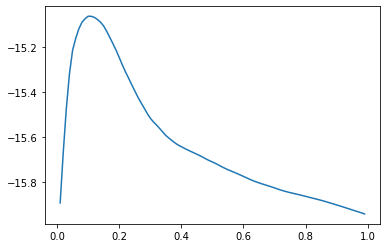

In [11]:
lassReg1 = Lasso()
np.mean(cross_val_score(lassReg1,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lassReg2 = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lassReg2,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
dferror = pd.DataFrame(err, columns = ['alpha','error'])
dferror[dferror.error == max(dferror.error)]

Using Lasso Regression to further smoothen out the errors, at an alpha value of 0.1, we are able to smoothen our mean absolute error to 15.06 per prediction. 

In [12]:
bestlass = Lasso(alpha=.1)
bestlass.fit(X_train,y_train)

Lasso(alpha=0.1)

In [13]:
lasspred = bestlass.predict(X_test)

In [14]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lasspred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lasspred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lasspred)))

Mean Absolute Error: 16.17882019058659
Mean Squared Error: 431.4767867694411
Root Mean Squared Error: 20.772019323345553


In [15]:
# Calculate the absolute errors
lassoerrors = abs(lasspred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(lassoerrors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
meanab = 100 * (lassoerrors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(meanab)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 16.18 degrees.
Accuracy: 74.89 %.


# Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=1000,random_state=42)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [17]:
y_pred = regressor.predict(X_test)

In [18]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,59.5,69.906167
1,42.0,52.427310
2,150.0,87.627174
3,59.5,74.183750
4,99.0,67.282350
...,...,...
237,56.0,55.494500
238,80.0,73.865925
239,59.0,72.780800
240,66.0,40.270500


In [19]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 15.752313017261
Mean Squared Error: 424.83051532290494
Root Mean Squared Error: 20.61141711098257


In [20]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 15.75 degrees.
Accuracy: 75.6 %.


C:\Users\dinos\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\dinos\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


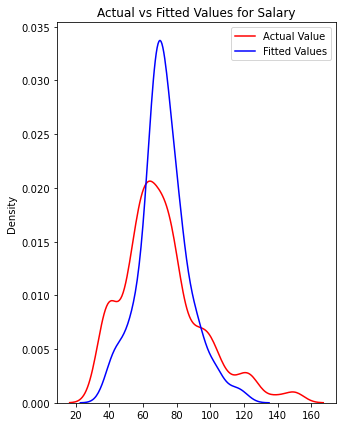

In [37]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Salary')

plt.legend(loc="upper right")
plt.show()
plt.close()

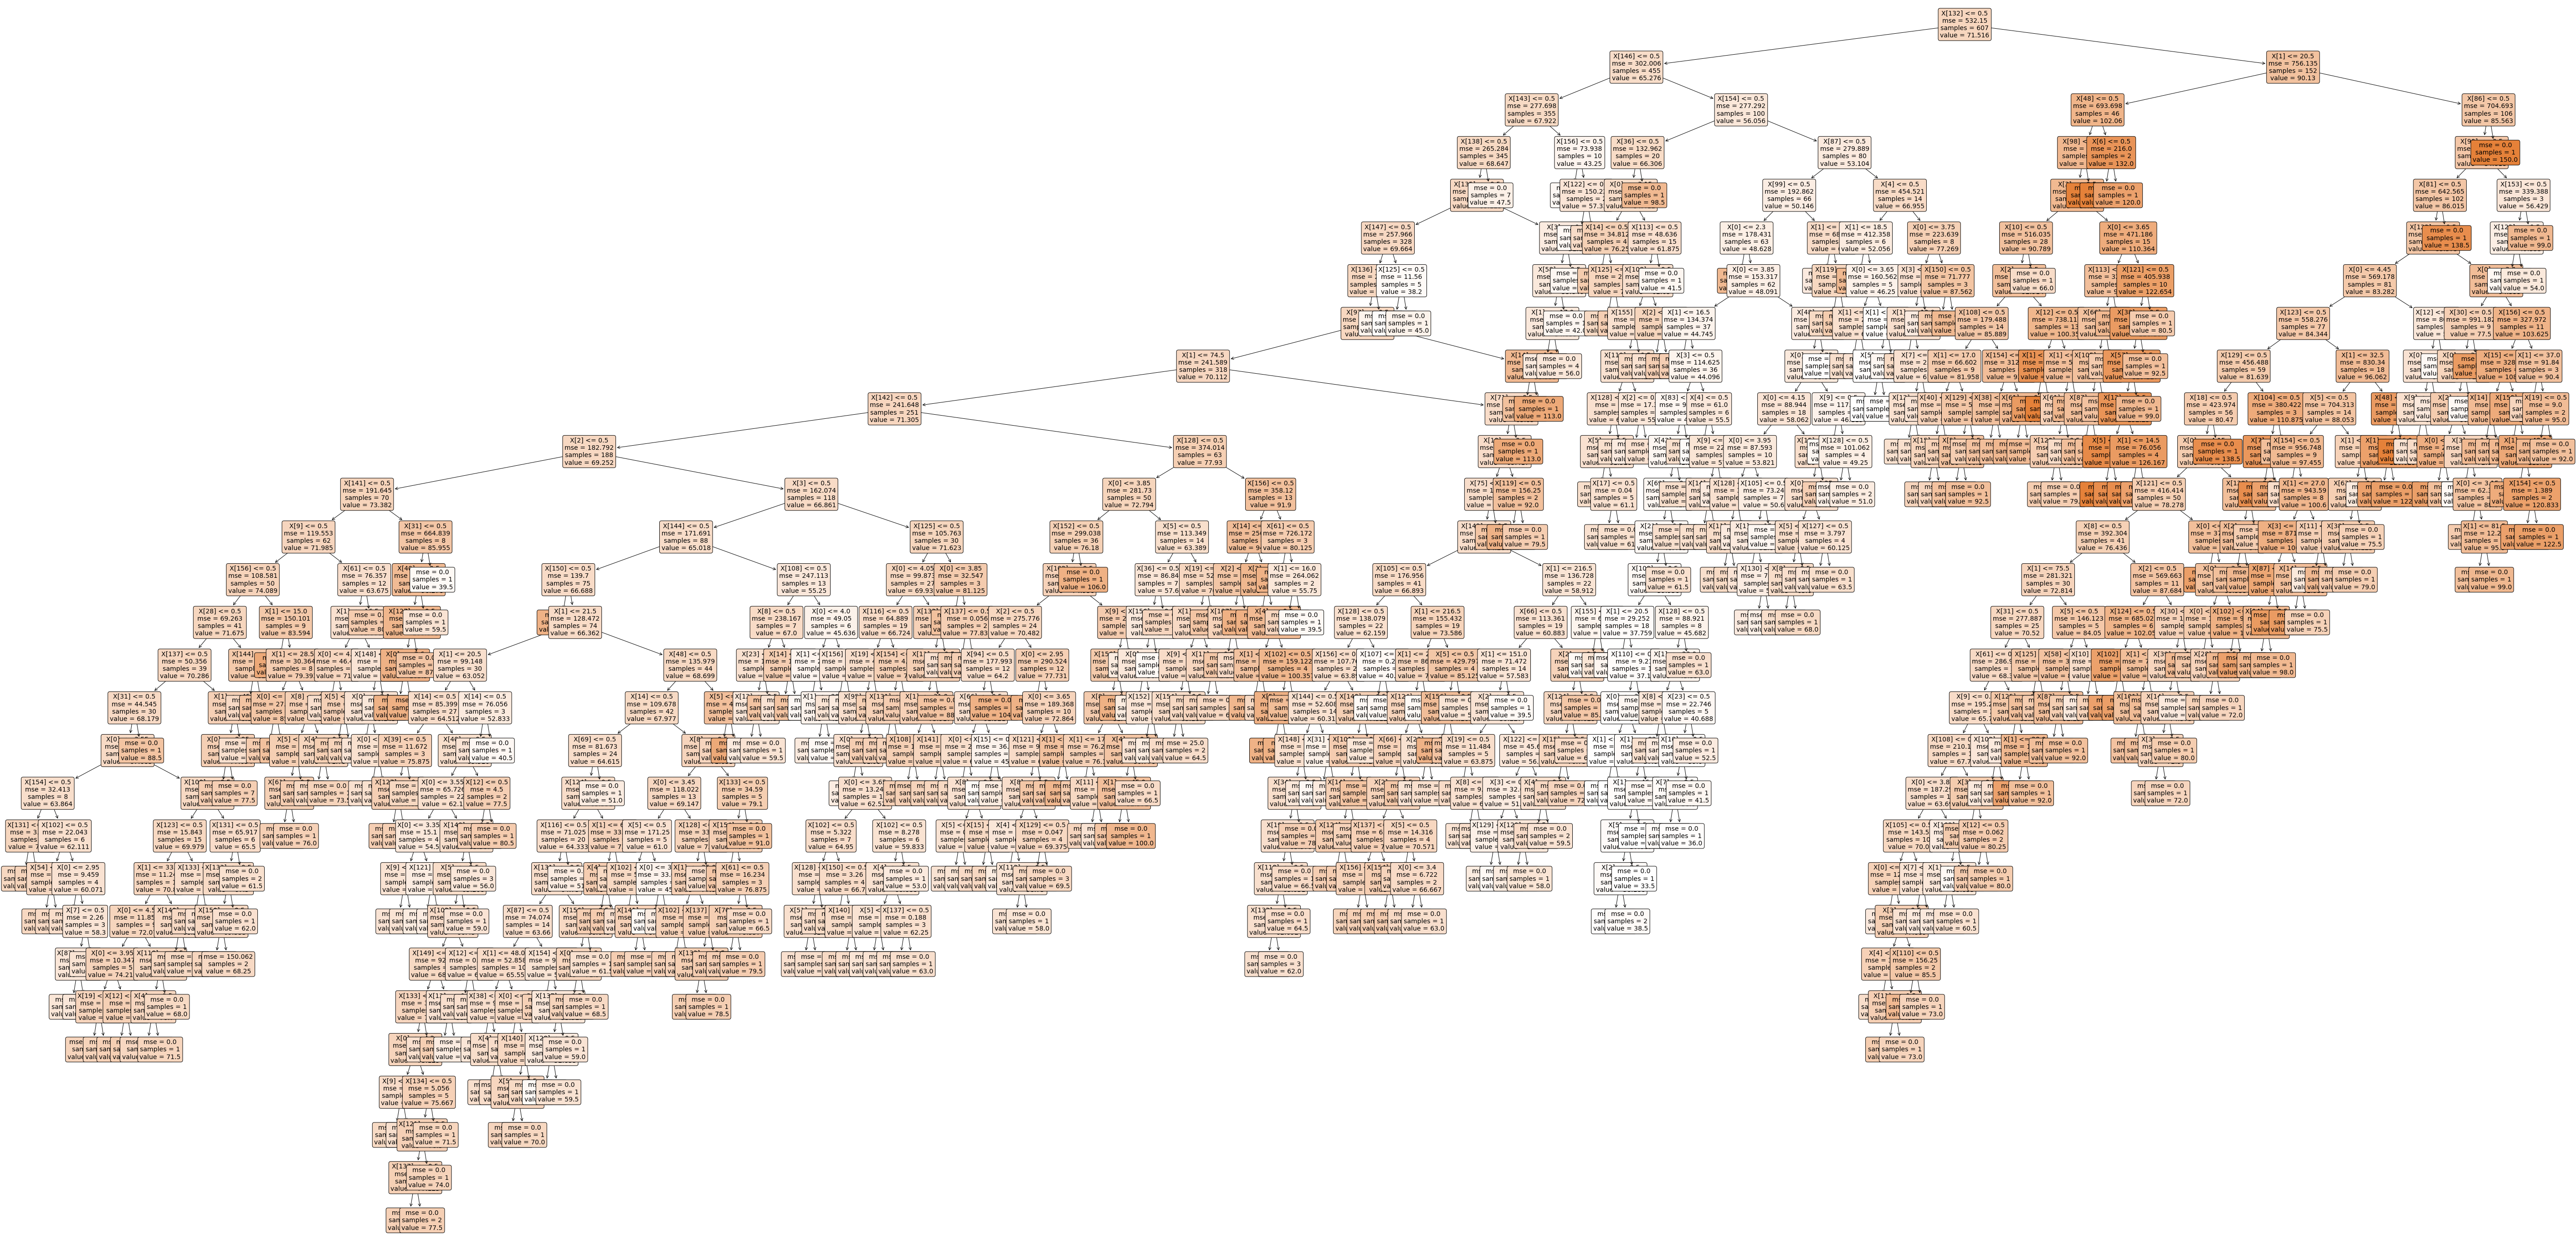

In [22]:
import pydot
# Pull out one tree from the forest
Tree = regressor.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(100,50))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);

Using Random Forest, we achieve an accuracy of 75.6%

# Grid Search CV

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(regressor,parameters,scoring='neg_mean_absolute_error',cv=3)

In [25]:
gs.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=1000,
                                             random_state=42),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [26]:
gs.best_score_

-15.597102807918759

In [27]:
gs.best_estimator_

RandomForestRegressor(criterion='mae', n_estimators=270, random_state=42)

In [34]:
gridpredict = gs.best_estimator_.predict(X_test)

In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,gridpredict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, gridpredict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, gridpredict)))

Mean Absolute Error: 15.637940006121823
Mean Squared Error: 429.0181627441644
Root Mean Squared Error: 20.712753625343115


In [36]:
# Calculate the absolute errors
gserrors = abs(gridpredict - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(gserrors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
meanab = 100 * (gserrors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(meanab)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 15.64 degrees.
Accuracy: 75.76 %.


After using GridSearchCV tuning, we are only able to improve the model by 0.16% to 75.76%